In [1]:
# Computing the halo shape of the MW in presence of the LMC

In [2]:
%matplotlib notebook
import jellyfish
import sys
sys.path.append('../')
import reading_snapshots
import pygadgetreader
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

In [3]:
MW_post = reading_snapshots.read_MW_snap_com_coordinates('../../../MW_anisotropy/code/test_snaps/', 'MWLMC5_100M_new_b1_110', LMC=True,
                                                                 N_halo_part=100000000, pot=True)

Reading host  snapshot
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
Host disk com: [ 9.19391488 42.1269949  -3.31300547] [ 10.34109411  28.95649597 -39.88921287]
Returning DM    Potential
Loading MW particles and LMC particles


In [5]:
MW_pos = pygadgetreader.readsnap('../../../MW_anisotropy/code/test_snaps/MW2_100M_beta1_vir_017', 'pos', 'dm')

Returning DM    Positions


In [8]:
MWLMC_pos = pygadgetreader.readsnap('../../../MW_anisotropy/code/test_snaps/MWLMC5_100M_new_b1_110', 'pos', 'dm')

Returning DM    Positions


In [7]:
len(MWLMC_pos)

115000000

# Halo shape of the MW without the LMC:


In [8]:
#data_MW = np.loadtxt('../MW/MW_100M_b1_dm_part_1e6.txt')

In [9]:
rand_particles_1e6 = np.random.randint(0, 100000000, 10000000)

In [10]:
pos_MW = MW_pos[rand_particles_1e6]

In [11]:
r_s_mw = np.arange(20, 300, 5)
s_s_mw = np.zeros(len(r_s_mw))
q_s_mw = np.zeros(len(r_s_mw))

s_v_mw = np.zeros(len(r_s_mw))
q_v_mw = np.zeros(len(r_s_mw))

vec_s_mw = np.zeros((len(r_s_mw), 3, 3))
vec_v_mw = np.zeros((len(r_s_mw), 3, 3))

axis_s_mw = np.zeros((len(r_s_mw), 3))

axis_v_mw = np.zeros((len(r_s_mw), 3))

j = 0
for i in r_s_mw:
    vec_s_mw[j], axis_s_mw[j], s_s_mw[j], q_s_mw[j] = jellyfish.shapes.iterate_shell(pos_MW, i, 10, 1E-2)
    vec_v_mw[j], axis_v_mw[j], s_v_mw[j], q_v_mw[j] = jellyfish.shapes.iterate_volume(pos_MW, i, 1E-2)
    j+=1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


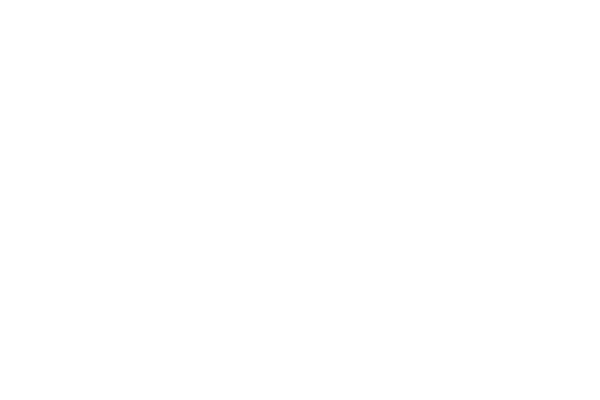

(0.9, 1.01)

In [12]:
plt.figure()
plt.plot(r_s_mw, s_s_mw, c='C0', ls='--', label='s (Shells)')
plt.plot(r_s_mw, q_s_mw, c='C1', ls='--', label='q (Shells)')
plt.plot(r_s_mw, s_v_mw, c='C0', label='s (Volume)')
plt.plot(r_s_mw, q_v_mw, C='C1', label='q (Volume)')
plt.xlabel(r'$r \rm{[kpc]}$')
plt.ylabel('$q, s$')
plt.legend()
plt.ylim(0.9, 1.01)

# Halo shape MW halo in the presence of the LMC using only MW DM particles

In [13]:
#data_MWLMC = np.loadtxt('../MWLMC/MWLMC_100M_b1_dm_part_1e6_500.txt')
data_MWLMC = MW_post[0]

In [14]:
data_MWLMC = data_MWLMC[rand_particles_1e6]

In [15]:
dr = 5
r_s_mwlmc = np.arange(20, 300, dr)
s_s_mwlmc = np.zeros(len(r_s_mwlmc))
q_s_mwlmc = np.zeros(len(r_s_mwlmc))

s_v_mwlmc = np.zeros(len(r_s_mwlmc))
q_v_mwlmc = np.zeros(len(r_s_mwlmc)) 

vec_s_mwlmc = np.zeros((len(r_s_mwlmc), 3, 3))
vec_v_mwlmc = np.zeros((len(r_s_mwlmc), 3, 3))

axis_s_mwlmc = np.zeros((len(r_s_mwlmc), 3))
axis_v_mwlmc = np.zeros((len(r_s_mwlmc), 3))

j = 0

for i in r_s_mwlmc:
    vec_s_mwlmc[j], axis_s_mwlmc[j], s_s_mwlmc[j], q_s_mwlmc[j] = jellyfish.shapes.iterate_shell(data_MWLMC, i, dr, 1E-2)
    vec_v_mwlmc[j], axis_s_mwlmc[j], s_v_mwlmc[j], q_v_mwlmc[j] = jellyfish.shapes.iterate_volume(data_MWLMC, i, 1E-2)
    j+=1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


In [20]:
np.savetxt('vectors_s_mwlmc.txt', vec_s_mwlmc.flatten())
np.savetxt('vectors_v_mwlmc.txt', vec_v_mwlmc.flatten())
#np.savetxt('vectors_s_mwlmc.txt', vec_s_mwlmc_all.flatten())
#np.savetxt('vectors_v_mwlmc.txt', vec_v_mwlmc_all.flatten())
np.savetxt('s_s_mwlmc.txt', s_s_mwlmc)
np.savetxt('s_v_mwlmc.txt', s_v_mwlmc)
np.savetxt('q_s_mwlmc.txt', q_s_mwlmc)
np.savetxt('q_v_mwlmc.txt', q_v_mwlmc)
#np.savetxt('s_s_mwlmc_all.txt', s_s_mwlmc_all)
#np.savetxt('s_v_mwlmc_all.txt', s_v_mwlmc_all)
#np.savetxt('q_s_mwlmc_all.txt', q_s_mwlmc_all)
#np.savetxt('q_v_mwlmc_all.txt', q_v_mwlmc_all)

<IPython.core.display.Javascript object>


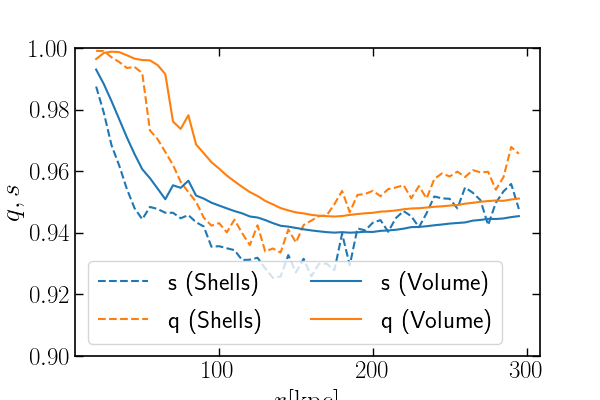

(0.9, 1)

In [21]:
plt.figure()
plt.plot(r_s_mwlmc, s_s_mwlmc, c='C0', ls='--', label='s (Shells)')
plt.plot(r_s_mwlmc, q_s_mwlmc, c='C1', ls='--', label='q (Shells)')
plt.plot(r_s_mwlmc, s_v_mwlmc, c='C0', label='s (Volume)')
plt.plot(r_s_mwlmc, q_v_mwlmc, c='C1', label='q (Volume)')
plt.xlabel(r'$r\rm{[kpc]}$')
plt.ylabel('$q, s$')
plt.legend(loc='lower left', ncol=2)
plt.ylim(0.9, 1)

# Halo shape of the MW and the LMC using both particles

In [4]:
rand_particles_1e6_mwlmc = np.random.randint(0, 115000000, 1000000)

In [9]:
MWLMC_pos = MWLMC_pos[rand_particles_1e6_mwlmc]

In [25]:
dr = 10
r_s_mwlmc_all = np.arange(20, 300, dr)
s_s_mwlmc_all = np.zeros(len(r_s_mwlmc_all))
q_s_mwlmc_all = np.zeros(len(r_s_mwlmc_all))

s_v_mwlmc_all = np.zeros(len(r_s_mwlmc_all))
q_v_mwlmc_all = np.zeros(len(r_s_mwlmc_all)) 

vec_s_mwlmc_all = np.zeros((len(r_s_mwlmc_all), 3, 3))
vec_v_mwlmc_all = np.zeros((len(r_s_mwlmc_all), 3, 3))
j = 0
axis_s_mwlmc_all = np.zeros((len(r_s_mwlmc_all),3))
axis_v_mwlmc_all = np.zeros((len(r_s_mwlmc_all),3))

for i in r_s_mwlmc_all:
    vec_s_mwlmc_all[j], axis_s_mwlmc_all[j], s_s_mwlmc_all[j], q_s_mwlmc_all[j] = jellyfish.shapes.iterate_shell(MWLMC_pos, i, dr, 1E-2)
    #vec_v_mwlmc_all[j], axis_v_mwlmc_all[j], s_v_mwlmc_all[j], q_v_mwlmc_all[j] = jellyfish.shapes.iterate_volume(MWLMC_pos, i, 1E-2)
    j+=1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


to many iterations to find halo shape
to many iterations to find halo shape
to many iterations to find halo shape
to many iterations to find halo shape
to many iterations to find halo shape


In [5]:
dr = 10
r_s_mwlmc_all = np.arange(20, 300, dr)

In [41]:
print('20')
vec_s_mwlmc_all_20, axis_s_mwlmc_all_20, s_s_mwlmc_all_20, q_s_mwlmc_all_20, pos_s_20 = jellyfish.shapes.iterate_shell(MWLMC_pos, 20, 10, 1E-2, return_pos=True)
print('40')
vec_s_mwlmc_all_40, axis_s_mwlmc_all_40, s_s_mwlmc_all_40, q_s_mwlmc_all_40, pos_s_40 = jellyfish.shapes.iterate_shell(MWLMC_pos, 40, 10, 1E-2, return_pos=True)
print('60')

vec_s_mwlmc_all_60, axis_s_mwlmc_all_60, s_s_mwlmc_all_60, q_s_mwlmc_all_60, pos_s_60 = jellyfish.shapes.iterate_shell(MWLMC_pos, 60, 10, 1E-2, return_pos=True)
print('80')

vec_s_mwlmc_all_80, axis_s_mwlmc_all_80, s_s_mwlmc_all_80, q_s_mwlmc_all_80, pos_s_80 = jellyfish.shapes.iterate_shell(MWLMC_pos, 80, 10, 1E-2, return_pos=True)
print('100')

vec_s_mwlmc_all_100, axis_s_mwlmc_all_100, s_s_mwlmc_all_100, q_s_mwlmc_all_100, pos_s_100 = jellyfish.shapes.iterate_shell(MWLMC_pos, 100, 10, 1E-2, return_pos=True)
print('150')

vec_s_mwlmc_all_150, axis_s_mwlmc_all_150, s_s_mwlmc_all_150, q_s_mwlmc_all_150, pos_s_150 = jellyfish.shapes.iterate_shell(MWLMC_pos, 150, 10, 1E-2, return_pos=True)
print('200')

vec_s_mwlmc_all_200, axis_s_mwlmc_all_200, s_s_mwlmc_all_200, q_s_mwlmc_all_200, pos_s_200 = jellyfish.shapes.iterate_shell(MWLMC_pos, 200, 10, 1E-2, return_pos=True)


20
40
60
to many iterations to find halo shape
80
100
150
200


In [42]:
ellips_20 = jellyfish.ellipse_3dcartesian(axis_s_mwlmc_all_20, vec_s_mwlmc_all_20)
ellips_40 = jellyfish.ellipse_3dcartesian(axis_s_mwlmc_all_40, vec_s_mwlmc_all_40.T)
ellips_60 = jellyfish.ellipse_3dcartesian(axis_s_mwlmc_all_60, vec_s_mwlmc_all_60.T)
ellips_80 = jellyfish.ellipse_3dcartesian(axis_s_mwlmc_all_80, vec_s_mwlmc_all_80)
ellips_100 = jellyfish.ellipse_3dcartesian(axis_s_mwlmc_all_100, vec_s_mwlmc_all_100)
ellips_150 = jellyfish.ellipse_3dcartesian(axis_s_mwlmc_all_150, vec_s_mwlmc_all_150)
ellips_200 = jellyfish.ellipse_3dcartesian(axis_s_mwlmc_all_200, vec_s_mwlmc_all_200)

<IPython.core.display.Javascript object>


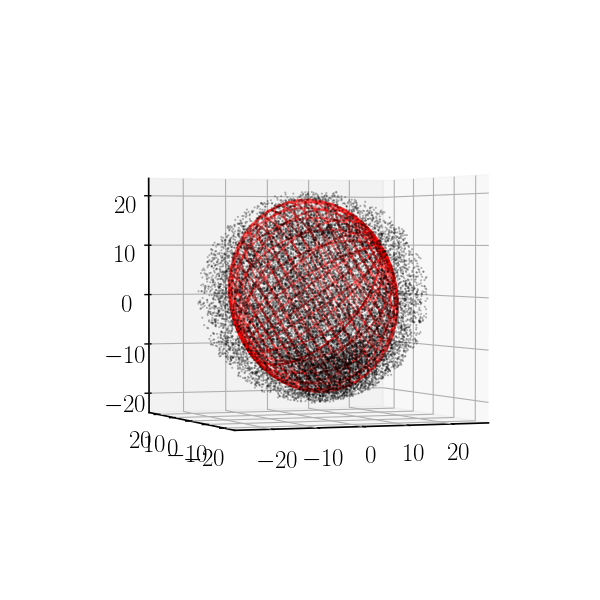

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [27]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

#hack  for equal axes
ax.set_aspect('equal')
ax.scatter(pos_s_20[:,0], pos_s_20[:,1], pos_s_20[:,2],  marker='.', s=1, alpha=0.3, c='k')
ax.plot_wireframe(ellips_20[:,:,0], ellips_20[:,:,1], ellips_20[:,:,2], rstride=4, cstride=4, color='r', alpha=0.5)

#ax.set_xlim(-1, 1)
#ax.set_ylim(-1, 1)
#ax.set_zlim(-1, 1)

<IPython.core.display.Javascript object>


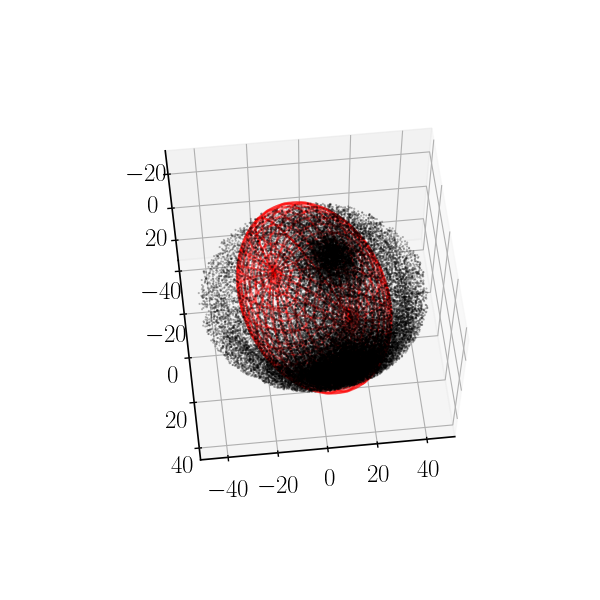

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [34]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.scatter(pos_s_40[:,0], pos_s_40[:,1], pos_s_40[:,2],  marker='.', s=1, alpha=0.3, c='k')
ax.plot_wireframe(ellips_40[:,:,0], ellips_40[:,:,1], ellips_40[:,:,2], rstride=4, cstride=4, color='r', alpha=0.5)

#ax.set_xlim(-1, 1)

<IPython.core.display.Javascript object>


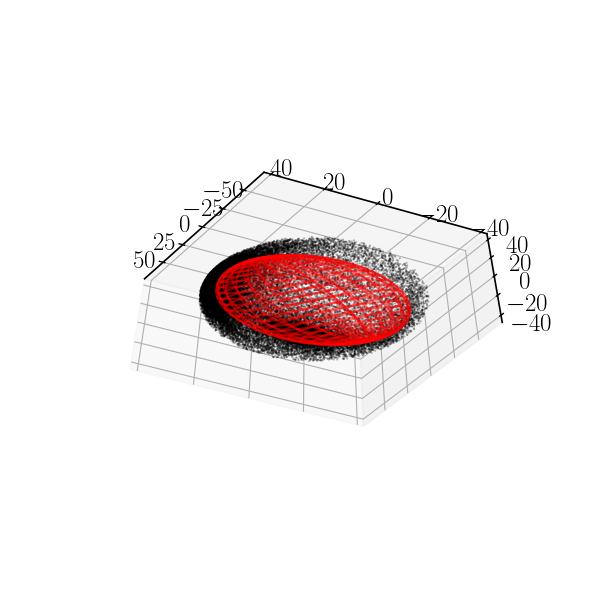

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [37]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.scatter(pos_s_60[:,0], pos_s_60[:,1], pos_s_60[:,2],  marker='.', s=1, alpha=0.3, c='k')
ax.plot_wireframe(ellips_60[:,:,0], ellips_60[:,:,1], ellips_60[:,:,2], rstride=4, cstride=4, color='r', alpha=0.5)

#ax.set_xlim(-1, 1)

<IPython.core.display.Javascript object>


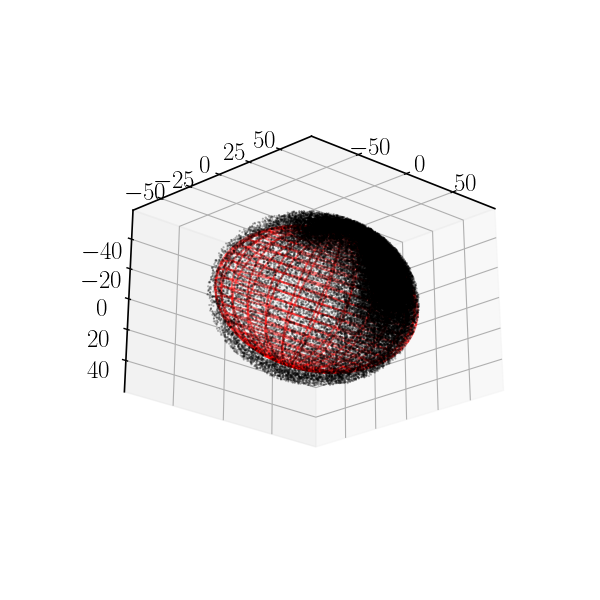

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [43]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.scatter(pos_s_80[:,0], pos_s_80[:,1], pos_s_80[:,2],  marker='.', s=1, alpha=0.3, c='k')
ax.plot_wireframe(ellips_80[:,:,0], ellips_80[:,:,1], ellips_80[:,:,2], rstride=4, cstride=4, color='r', alpha=0.5)

#ax.set_xlim(-1, 1)

<IPython.core.display.Javascript object>


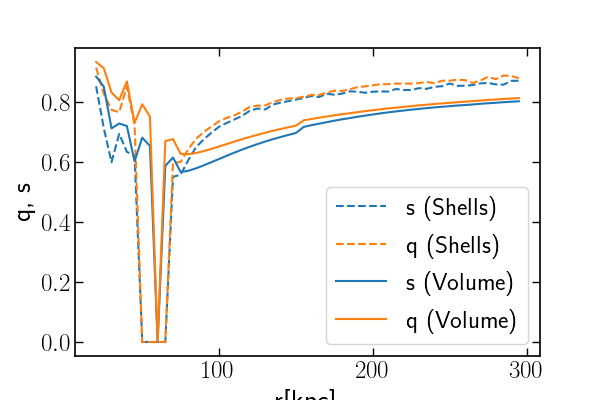

In [26]:
plt.figure()
plt.plot(r_s_mwlmc_all, s_s_mwlmc_all, c='C0', ls='--', label='s (Shells)')
plt.plot(r_s_mwlmc_all, q_s_mwlmc_all, c='C1', ls='--', label='q (Shells)')
plt.plot(r_s_mwlmc_all, s_v_mwlmc_all, c='C0', label='s (Volume)')
plt.plot(r_s_mwlmc_all, q_v_mwlmc_all, c='C1', label='q (Volume)')
plt.xlabel('r[kpc]')
plt.ylabel('q, s')
plt.legend()
#ylim(0.9, 1)

In [28]:
T_mwlmc_all_s = (1-q_s_mwlmc_all**2)/(1-s_s_mwlmc_all**2)
T_mwlmc_all_v = (1-q_v_mwlmc_all**2)/(1-s_v_mwlmc_all**2)

In [27]:
T_mwlmc_s = (1-q_s_mwlmc**2)/(1-s_s_mwlmc**2)
T_mwlmc_v = (1-q_v_mwlmc**2)/(1-s_v_mwlmc**2)

<IPython.core.display.Javascript object>


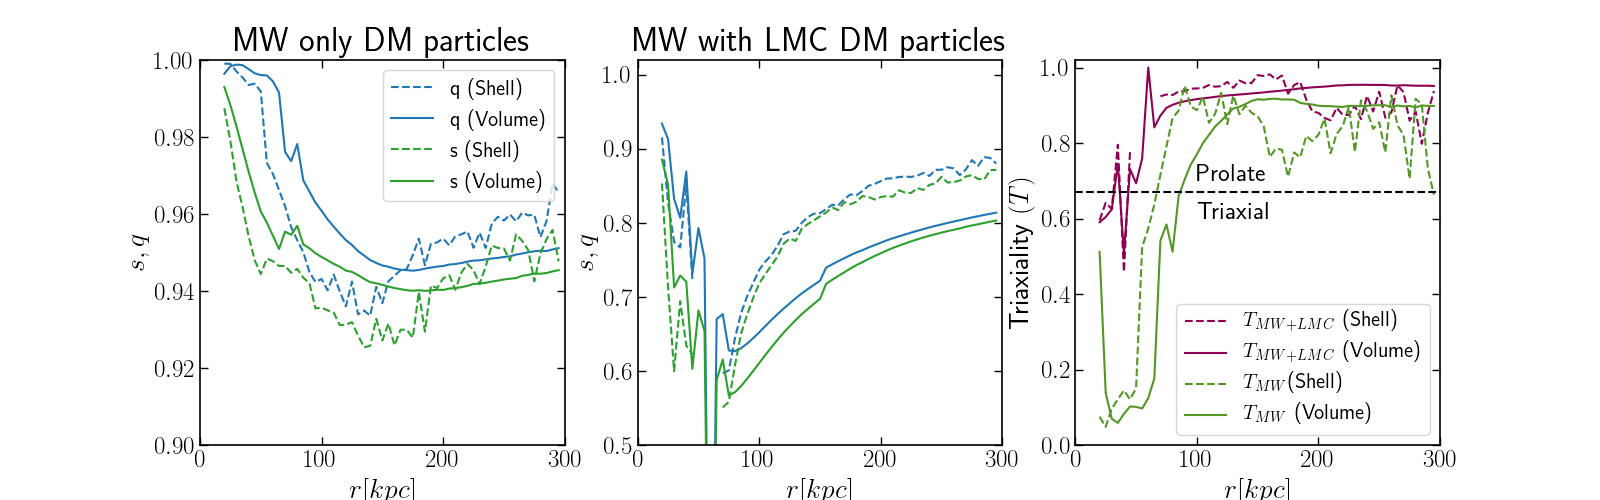

(0, 300)

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

zero_s_mw_w = np.where(s_s_mwlmc==0)[0]
zero_q_mw_w = np.where(q_s_mwlmc==0)[0]

zero_s_mwlmc = np.where(s_s_mwlmc_all>0)[0]
zero_q_mwlmc = np.where(q_s_mwlmc_all>0)[0]

zero_s_mwlmc_w = np.where(s_s_mwlmc_all==0)[0]
zero_q_mwlmc_w = np.where(q_s_mwlmc_all==0)[0]

ax[0].set_title('MW only DM particles')
ax[0].plot(r_s_mwlmc, q_s_mwlmc, c='C0', label='q (Shell)', ls='--')
#ax[0].plot(r_s_mwlmc[zero_q_mw_w[-1]+1:], q_s_mwlmc[zero_q_mw_w[-1]+1:], c='C0', ls='--')

ax[0].plot(r_s_mwlmc, q_v_mwlmc, c='C0', label='q (Volume)')
ax[0].plot(r_s_mwlmc, s_s_mwlmc, c='C2', label='s (Shell)', ls='--')
#ax[0].plot(r_s_mwlmc[zero_s_mw_w[-1]+1:], s_s_mwlmc[zero_s_mw_w[-1]+1:], c='C2', ls='--')

ax[0].plot(r_s_mwlmc, s_v_mwlmc, c='C2', label='s (Volume)')
ax[0].set_ylim(0.9, 1.0)
ax[0].set_xlim(0, 300)
ax[0].set_xlabel(r'$r[kpc]$')
ax[0].set_ylabel('$s, q$')
ax[0].legend(fontsize=15)


ax[1].set_title('MW with LMC DM particles')
ax[1].plot(r_s_mwlmc_all[:zero_q_mwlmc_w[0]], q_s_mwlmc_all[:zero_q_mwlmc_w[0]], c='C0', label='q (Shell)', ls='--')
ax[1].plot(r_s_mwlmc_all[zero_q_mwlmc_w[-1]+1:], q_s_mwlmc_all[zero_q_mwlmc_w[-1]+1:], c='C0', ls='--')
ax[1].plot(r_s_mwlmc_all, q_v_mwlmc_all, c='C0', label='q (Volume)')

ax[1].plot(r_s_mwlmc_all, s_v_mwlmc_all, c='C2', label='s (Volume)')
ax[1].plot(r_s_mwlmc_all[:zero_s_mwlmc_w[0]], s_s_mwlmc_all[:zero_s_mwlmc_w[0]], c='C2', label='q (Shell)', ls='--')
ax[1].plot(r_s_mwlmc_all[zero_s_mwlmc_w[-1]+1:], s_s_mwlmc_all[zero_s_mwlmc_w[-1]+1:], c='C2', ls='--')
ax[1].set_ylim(0.5, 1.02)
ax[1].set_xlim(0, 300)
ax[1].set_xlabel(r'$r[kpc]$')
ax[1].set_ylabel('$s, q$')


# Triaxiality 
ax[2].plot(r_s_mwlmc_all[:zero_s_mwlmc_w[0]], T_mwlmc_all_s[:zero_s_mwlmc_w[0]], c='#8e0152', label='$T_{MW+LMC}$ (Shell)', ls='--')
ax[2].plot(r_s_mwlmc_all[zero_s_mwlmc_w[-1]+1:], T_mwlmc_all_s[zero_s_mwlmc_w[-1]+1:], c='#8e0152', ls='--')

ax[2].plot(r_s_mwlmc_all, T_mwlmc_all_v, c='#8e0152', label='$T_{MW+LMC}$ (Volume)')

ax[2].plot(r_s_mwlmc, T_mwlmc_s, c='#539725', label='$T_{MW} $(Shell)', ls='--')
#ax[2].plot(r_s_mwlmc, T_mwlmc_s[zero_s_mw_w[-1]+1:], c='#539725', ls='--')

ax[2].plot(r_s_mwlmc, T_mwlmc_v, c='#539725', label='$T_{MW}$ (Volume)')

ax[2].legend(fontsize=15)
ax[2].text(100, 0.7, 'Prolate')
ax[2].text(100, 0.6, 'Triaxial')
ax[2].axhline(0.67, c='k', ls='--')
ax[2].set_ylabel('Triaxiality $(T)$')
ax[2].set_xlabel(r'$r[kpc]$')
ax[2].set_ylim(0, 1.02)
ax[2].set_xlim(0, 300)
#axhline(0.33)

#savefig('MWLMC_halo_shape.pdf', bbox_inches='tight')

In [58]:
cmap = plt.cm.get_cmap('PiYG', 10)    # PiYG
for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    print(matplotlib.colors.rgb2hex(rgb))

#8e0152
#c82582
#e285b8
#f5c4e1
#faeaf3
#eef6e1
#c7e89f
#8cc450
#539725
#276419


In [31]:
## Angle of major axis with respect to galactocentric coordinates

In [41]:
LMC_pos = np.array([-1, -41, -27])
LMC_unit_vector = LMC_pos/np.linalg.norm(LMC_pos)
print(LMC_unit_vector)

[-0.0203658  -0.83499765 -0.5498765 ]


In [42]:
l_hat = np.array([0,0,-1])
b_hat = np.array([1,0,0])

delta_l_mwlmc = np.zeros(len(vec_v_mwlmc_all))
delta_b_mwlmc = np.zeros(len(vec_v_mwlmc_all))

delta_l_mw = np.zeros(len(vec_v_mwlmc))
delta_b_mw = np.zeros(len(vec_v_mwlmc))

for i in range(len(vec_v_mwlmc_all)):
    delta_b_mwlmc[i] = np.arcsin(vec_v_mwlmc_all[i][2,0])*180/np.pi 
    delta_l_mwlmc[i] = 180+(np.arccos(vec_v_mwlmc_all[i][0,0]/np.sqrt(vec_v_mwlmc_all[i][0,0]**2+vec_v_mwlmc_all[i][1,0]**2)))*180/np.pi
    
    delta_b_mw[i] = np.arcsin(vec_v_mwlmc[i][2,0])*180/np.pi 
    delta_l_mw[i] = 180+(np.arccos(vec_v_mwlmc[i][0,0]/np.sqrt(vec_v_mwlmc[i][0,0]**2+vec_v_mwlmc[i][1,0]**2)))*180/np.pi


In [43]:
LMC_delta_l = 180+np.arccos(LMC_unit_vector[0]/np.sqrt(LMC_unit_vector[0]**2+LMC_unit_vector[1]**2))*180/np.pi
print(LMC_delta_l)

271.39718102729637


In [78]:
r_s_mwlmc_all

array([ 20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,
        85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145,
       150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210,
       215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275,
       280, 285, 290, 295])

In [80]:
cmap = plt.cm.get_cmap('PiYG', len(r_s_mwlmc_all))    # PiYG


In [86]:
matplotlib.colors.rgb2hex(cmap(0)[:3])

'#8e0152'

<IPython.core.display.Javascript object>


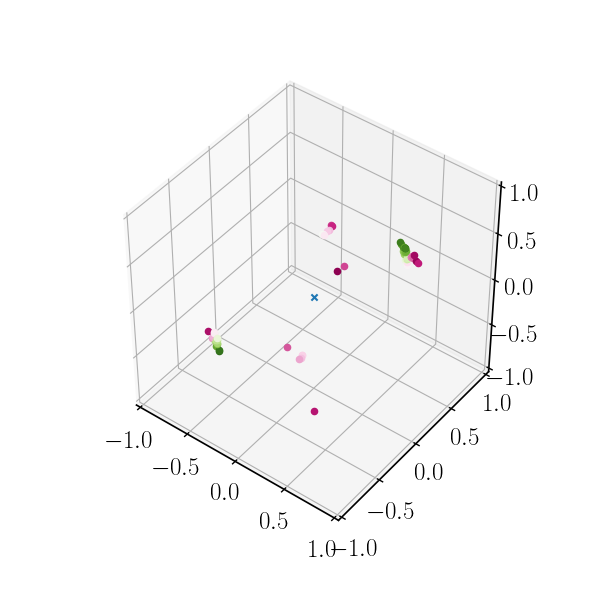

(-1, 1)

In [91]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

#hack  for equal axes
ax.set_aspect('equal')
ax.scatter(0,0,0, marker='x')
for i in range(56):
    ax.scatter(vec_s_mwlmc_all[i][0,0], vec_s_mwlmc_all[i][1,0], vec_s_mwlmc_all[i][2,0], c=matplotlib.colors.rgb2hex(cmap(i)[:3]))

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)


In [45]:
np.savetxt('pa_mwlmc_all.txt', vec_v_mwlmc_all[:,0])

In [46]:
np.savetxt('pa_mwlmc.txt', vec_v_mwlmc[:,0])

In [47]:
np.arccos(np.dot(LMC_unit_vector, l_hat))

0.9885799578532529

<IPython.core.display.Javascript object>


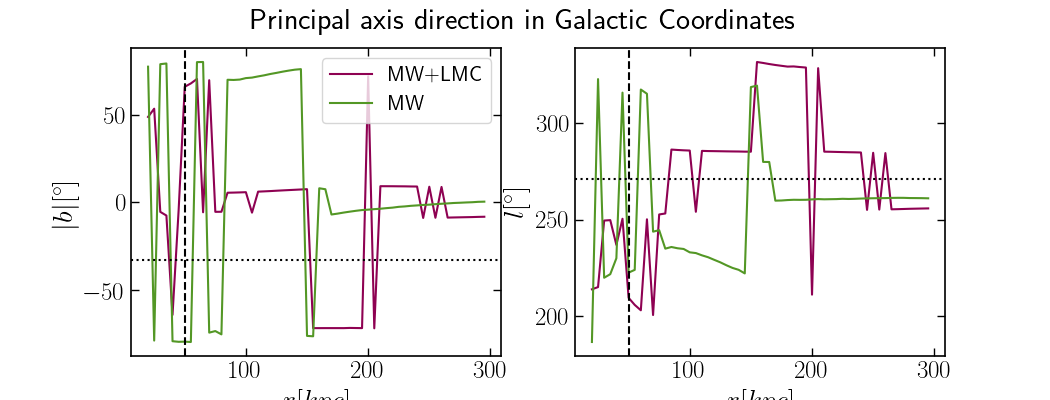

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10.5, 4))
fig.suptitle('Principal axis direction in Galactic Coordinates')
ax[0].plot(r_s_mwlmc_all, (delta_b_mwlmc), c='#8e0152', label='MW+LMC')
ax[0].plot(r_s_mwlmc, (delta_b_mw), c='#539725', label='MW')
ax[0].legend(fontsize=15)
ax[0].set_xlabel('$r[kpc]$')
ax[0].set_ylabel(r'$|b|[^{\circ}]$')
ax[0].axvline(50, c='k', ls='--')
ax[0].axhline(-33, c='k', ls=':')


ax[1].plot(r_s_mwlmc_all, (delta_l_mwlmc), c='#8e0152')
ax[1].plot(r_s_mwlmc, delta_l_mw, c='#539725')
ax[1].set_xlabel('$r[kpc]$')
ax[1].set_ylabel(r'$l[^{\circ}]$')
ax[1].axvline(50, c='k', ls='--')
ax[1].axhline(271, c='k', ls=':')
#savefig('principal_axis_galactic.pdf')

# Discussion:

- Prolate halos is expectes from radial mergers, whule oblate are expetec from tangential mergers
https://ui.adsabs.harvard.edu/abs/2019MNRAS.487..993D/abstract The LMC is in a radial orbit
  
- orientations is different between when the LMC particles are included

- With the shells method there is not convergence in certain regions of the halo when all the LMC particles
    are included. (just use unbound particles of the LMC?)
    
- What should we trust the most, shells or volumes? Shells seems better since it does not include all the volume and the shape at the given radius might be lest bias. Find if some articles describe this.

## To - do: 
- Fit ellipsoids to the SCF reconstructed density! See how good or bad are the fits.
- Compare with vera ciro predictions
- Re-do analysis for high resolution halos
- Compute shape tensor with w=r^{-2}?